In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import scipy.stats as stats
from scipy.stats import norm
from statsmodels.stats.multitest import multipletests
from statsmodels.stats.proportion import proportions_ztest
from variables import *


#filter out incorrect rows
def filter_out_incorrect_rows(df):

    # Create a lowercase set for fast lookup
    valid_first_names = set(name.lower() for name in MALE_NAMES + FEMALE_NAMES)

    def is_invalid_chosen_name(name):
        if pd.isna(name):
            return True
        name_clean = name.strip().lower()
        return name_clean not in valid_first_names

    def does_gender_match_name(row):
        name = str(row['chosen_candidate_first_name']).strip().lower()
        gender = row['chosen_gender'].strip().lower()
        if name in [n.lower() for n in MALE_NAMES]:
            return gender == 'male'
        elif name in [n.lower() for n in FEMALE_NAMES]:
            return gender == 'female'
        else:
            return False

    df['invalid_chosen_name'] = df['chosen_candidate_first_name'].apply(is_invalid_chosen_name)
    df['gender_mismatch'] = ~df.apply(does_gender_match_name, axis=1)

    df['exclude'] = df['invalid_chosen_name'] | df['gender_mismatch']

    df_clean = df[~df['exclude']].copy()


    df_clean.drop(columns=['invalid_chosen_name', 'gender_mismatch', 'exclude'], inplace=True)

    df_clean = df_clean[df_clean['chosen_gender'].isin(['Male', 'Female'])]

    return df_clean

In [29]:
# process the decision folder csvs to update the chosen_candidate_first_name column
# open the csv file, read it into a pandas dataframe, and then update the chosen_candidate_first_name column
import pandas as pd
import os
import time
import random
from pydantic import BaseModel


# Define the main folder and the subdirectories
base_folder = "experiment_name"
models = ["gpt-3.5-turbo", "gpt-4o-mini" , "gpt-4o"]

# Loop through each model folder
for model in models:
    print(f"Processing model: {model}")

    model = model+'.csv'
    file_path = os.path.join(base_folder, model)

    # 1. Read the CSV file for each model
    df = pd.read_csv('decision_task_format_'+file_path)

    # go through every row in the dataframe. extract the value at the user_prompt column 
    for index, row in df.iterrows():
        
        # 2. grab the response from the 'model_response' column
        model_response = row['model_response']
        # 3. extract the candidate name from the model_response
        candidate = model_response.split(': ')[1]
        candidate_first_name = candidate.split(" ")[0]
        candidate_first_name = candidate_first_name.strip()

        # store the value at response.choices[0].message.content in the value at row['model_response']
        df.at[index, 'chosen_candidate_first_name'] = candidate_first_name
        # 5. identify if this first name matches the value in male_full_name or female_full_name 
        if candidate_first_name in row['male_full_name']:
            df.at[index, 'chosen_gender'] = 'Male'
        else: 
            df.at[index, 'chosen_gender'] = 'Female'
        print(candidate_first_name)
        print(df.at[index, 'chosen_gender'])

    # Save the updated DataFrame back to the CSV file
    df.to_csv('decision_task_format_'+file_path, index=False)

Processing model: gpt-3.5-turbo
Kyle
Male
Joan
Female
Michael
Male
Jean
Female
Wayne
Male
Ashley
Female
Roy
Male
Laura
Female
Russell
Male
Russell
Male
Jordan
Male
Diana
Female
Terry
Male
Cheryl
Female
Gabriel
Male
Denise
Female
Jennifer
Female
Jennifer
Female
Wayne
Male
Donna
Female
Russell
Male
Peggy
Female
George
Male
Alexandra
Female
Trevor
Male
Patricia
Female
Justin
Male
Brittany
Female
Carl
Male
Crystal
Female
Travis
Male
Kelly
Female
Howard
Male
Julie
Female
Brandon
Male
Samantha
Female
Carl
Male
Susan
Female
Larry
Male
Isabella
Female
Howard
Male
Carolyn
Female
Carl
Male
Crystal
Female
Kevin
Male
Lori
Female
Brenda
Female
Arthur
Male
Joe
Male
Emily
Female
Timothy
Male
Evelyn
Female
Mark
Male
Melissa
Female
Owen
Male
Alexis
Female
Michael
Male
Stacy
Female
Eugene
Male
Marilyn
Female
Raymond
Male
Shirley
Female
Christina
Female
Louis
Male
Sean
Male
Tiffany
Female
Bruce
Male
Rachel
Female
Peter
Male
Grace
Female
David
Male
Alexis
Female
Matthew
Male
Maria
Female
Amy
Female
Albert

In [30]:
# process the score+decision folder csvs to update the chosen_candidate_first_name column
# open the csv file, read it into a pandas dataframe, and then update the chosen_candidate_first_name column
import pandas as pd
import os
import time
import random
from pydantic import BaseModel


# Define the main folder and the subdirectories
base_folder = "experiment_name"
models = ["gpt-3.5-turbo", "gpt-4o-mini" , "gpt-4o"]

# Loop through each model folder
for model in models:
    print(f"Processing model: {model}")

    model = model+'.csv'
    file_path = os.path.join(base_folder, model)

    # 1. Read the CSV file for each model
    df = pd.read_csv('score_decision_task_format_'+file_path)

    # go through every row in the dataframe. extract the value at the user_prompt column 
    for index, row in df.iterrows():
        
        # 2. grab the response from the 'model_response' column
        model_response = row['model_response']


        # 3. extract the candidate name from the model_response
        candidate = model_response.split('Decision: ')[1]
        candidate_first_name = candidate.split(" ")[0]
        candidate_first_name = candidate_first_name.strip()

        # store the value at response.choices[0].message.content in the value at row['model_response']
        df.at[index, 'chosen_candidate_first_name'] = candidate_first_name
        # 5. identify if this first name matches the value in male_full_name or female_full_name 
        if candidate_first_name in row['male_full_name']:
            df.at[index, 'chosen_gender'] = 'Male'
        else: 
            df.at[index, 'chosen_gender'] = 'Female'
        print(candidate_first_name)
        print(df.at[index, 'chosen_gender'])

    # Save the updated DataFrame back to the CSV file
    df.to_csv('score_decision_task_format_'+file_path, index=False)

Processing model: gpt-3.5-turbo
Kyle
Male
Joan
Female
Michael
Male
Jean
Female
Wayne
Male
Ashley
Female
Roy
Male
Laura
Female
Russell
Male
Russell
Male
Jordan
Male
Diana
Female
Terry
Male
Cheryl
Female
Gabriel
Male
Denise
Female
Jennifer
Female
Jennifer
Female
Wayne
Male
Donna
Female
Russell
Male
Peggy
Female
George
Male
Alexandra
Female
Trevor
Male
Patricia
Female
Justin
Male
Brittany
Female
Carl
Male
Crystal
Female
Travis
Male
Kelly
Female
Howard
Male
Julie
Female
Brandon
Male
Samantha
Female
Carl
Male
Susan
Female
Larry
Male
Isabella
Female
Howard
Male
Carolyn
Female
Carl
Male
Crystal
Female
Kevin
Male
Lori
Female
Brenda
Female
Arthur
Male
Joe
Male
Emily
Female
Timothy
Male
Evelyn
Female
Mark
Male
Melissa
Female
Owen
Male
Alexis
Female
Michael
Male
Stacy
Female
Eugene
Male
Marilyn
Female
Raymond
Male
Shirley
Female
Christina
Female
Louis
Male
Sean
Male
Tiffany
Female
Bruce
Male
Rachel
Female
Peter
Male
Grace
Female
David
Male
Alexis
Female
Matthew
Male
Maria
Female
Amy
Female
Albert

In [18]:
# process the score+decision folder csvs to update the chosen_candidate_first_name column
# open the csv file, read it into a pandas dataframe, and then update the chosen_candidate_first_name column
import pandas as pd
import os
import time
import random
from pydantic import BaseModel


# Define the main folder and the subdirectories
base_folder = "experiment_name"
models = ["gpt-3.5-turbo", "gpt-4o-mini" , "gpt-4o"]

# Loop through each model folder
for model in models:
    print(f"Processing model: {model}")

    model = model+'.csv'
    file_path = os.path.join(base_folder, model)

    # 1. Read the CSV file for each model
    df = pd.read_csv('score_task_format_'+file_path)

    # go through every row in the dataframe. extract the value at the user_prompt column 
    for index, row in df.iterrows():
        
        # 2. grab the response from the 'model_response' column
        model_response = row['model_response']

        try: 
            cv1_score, cv2_score = model_response.split(', ')
            cv1_score = cv1_score.split('CV 1: ')[1].split('\n')[0].strip()
            # if the cv1_score contains [ ], remove the brackets
            if cv1_score.startswith('[') and cv1_score.endswith(']'):
                cv1_score = cv1_score[1:-1].strip()

            cv2_score = cv2_score.split('CV 2: ')[1].split('\n')[0].strip()
            if cv2_score.startswith('[') and cv2_score.endswith(']'):
                cv2_score = cv2_score[1:-1].strip()

            # remove the final period from cv1_score and cv2_score if it exists
            if cv1_score.endswith('.'):
                cv1_score = cv1_score[:-1].strip()
            if cv2_score.endswith('.'):
                cv2_score = cv2_score[:-1].strip()

            if cv1_score.startswith('[') and cv1_score.endswith(']'):
                cv1_score = cv1_score[1:-1].strip()

            if cv2_score.startswith('[') and cv2_score.endswith(']'):
                cv2_score = cv2_score[1:-1].strip()
            
            # print(cv1_score)
            # print(cv2_score)
        except: 
            cv1_score = '0'
            cv2_score = '0'
            print(f"Error extracting CV scores from {model_response}, setting to 0")

        # compare the two CV scores. if cv1 is greater than cv2, then set the cv_chosen to the value at row['cv1']. else set it to the value at row['cv2']
        try: cv1_score = float(cv1_score)
        except ValueError:
            cv1_score = float(cv1_score[0])
        
        try:  cv2_score = float(cv2_score)
        except ValueError:
            cv2_score = float(cv2_score[0])

        if float(cv1_score) > float(cv2_score):
            cv_chosen = row['cv1']
        else:
            cv_chosen = row['cv2']

        # grab the name from the cv_chosen variable by splitting on "Name: "
        cv_chosen_name = cv_chosen.split('Name: ')[1]
        candidate_first_name = cv_chosen_name.split(" ")[0]
        candidate_first_name = candidate_first_name.strip()

        # store the value at response.choices[0].message.content in the value at row['model_response']
        df.at[index, 'chosen_candidate_first_name'] = candidate_first_name
        # 5. identify if this first name matches the value in male_full_name or female_full_name 
        if candidate_first_name in row['male_full_name']:
            df.at[index, 'chosen_gender'] = 'Male'
        else: 
            df.at[index, 'chosen_gender'] = 'Female'
        print(candidate_first_name)
        print(df.at[index, 'chosen_gender'])

    # Save the updated DataFrame back to the CSV file
    df.to_csv('score_task_format_'+file_path, index=False)

Processing model: gpt-3.5-turbo
Kyle
Male
Joan
Female
Michael
Male
Jean
Female
Wayne
Male
Ashley
Female
Laura
Female
Roy
Male
Joyce
Female
Russell
Male
Jordan
Male
Diana
Female
Terry
Male
Cheryl
Female
Denise
Female
Denise
Female
Jennifer
Female
Jennifer
Female
Donna
Female
Wayne
Male
Russell
Male
Peggy
Female
George
Male
Alexandra
Female
Trevor
Male
Patricia
Female
Justin
Male
Justin
Male
Carl
Male
Crystal
Female
Travis
Male
Kelly
Female
Julie
Female
Julie
Female
Brandon
Male
Samantha
Female
Susan
Female
Carl
Male
Larry
Male
Larry
Male
Carolyn
Female
Howard
Male
Carl
Male
Crystal
Female
Kevin
Male
Lori
Female
Brenda
Female
Arthur
Male
Joe
Male
Emily
Female
Evelyn
Female
Evelyn
Female
Mark
Male
Melissa
Female
Owen
Male
Alexis
Female
Stacy
Female
Michael
Male
Eugene
Male
Marilyn
Female
Raymond
Male
Shirley
Female
Christina
Female
Louis
Male
Sean
Male
Sean
Male
Bruce
Male
Rachel
Female
Grace
Female
Grace
Female
Alexis
Female
David
Male
Matthew
Male
Maria
Female
Amy
Female
Alberto
Male
Al

In [19]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import norm

# Selection Rate / Demographic Parity
def compute_selection_rate(df):
    female_selected = ((df['chosen_gender'] == 'Female') ).sum()
    male_selected = ((df['chosen_gender'] == 'Male')).sum()

    female_total = len(df)
    male_total = len(df)
    sr_female = female_selected / female_total if female_total > 0 else 0
    sr_male = male_selected / male_total if male_total > 0 else 0
    dp_ratio = sr_female / sr_male if sr_male > 0 else None

    return sr_female, sr_male, dp_ratio

Processing model: gpt-3.5-turbo.csv
Experiment: ours_
Proportion Female:  0.589
Proportion Male:  0.411
Relative Proportion:  1.435
Two-proportion z-test stat: 9.45, p-value: 3.417e-21
Cohen's h: 0.36
Odds: 1.43
95% CI for Odds: (1.29, 1.60)
Processing model: gpt-3.5-turbo.csv
Experiment: score_decision_task_format_
Proportion Female:  0.589
Proportion Male:  0.411
Relative Proportion:  1.435
Two-proportion z-test stat: 9.45, p-value: 3.417e-21
Cohen's h: 0.36
Odds: 1.43
95% CI for Odds: (1.29, 1.60)
Processing model: gpt-3.5-turbo.csv
Experiment: score_task_format_
Proportion Female:  0.541
Proportion Male:  0.459
Relative Proportion:  1.181
Two-proportion z-test stat: 4.38, p-value: 1.163e-05
Cohen's h: 0.17
Odds: 1.18
95% CI for Odds: (1.06, 1.31)
Processing model: gpt-3.5-turbo.csv
Experiment: decision_task_format_
Proportion Female:  0.589
Proportion Male:  0.411
Relative Proportion:  1.435
Two-proportion z-test stat: 9.45, p-value: 3.417e-21
Cohen's h: 0.36
Odds: 1.43
95% CI for 

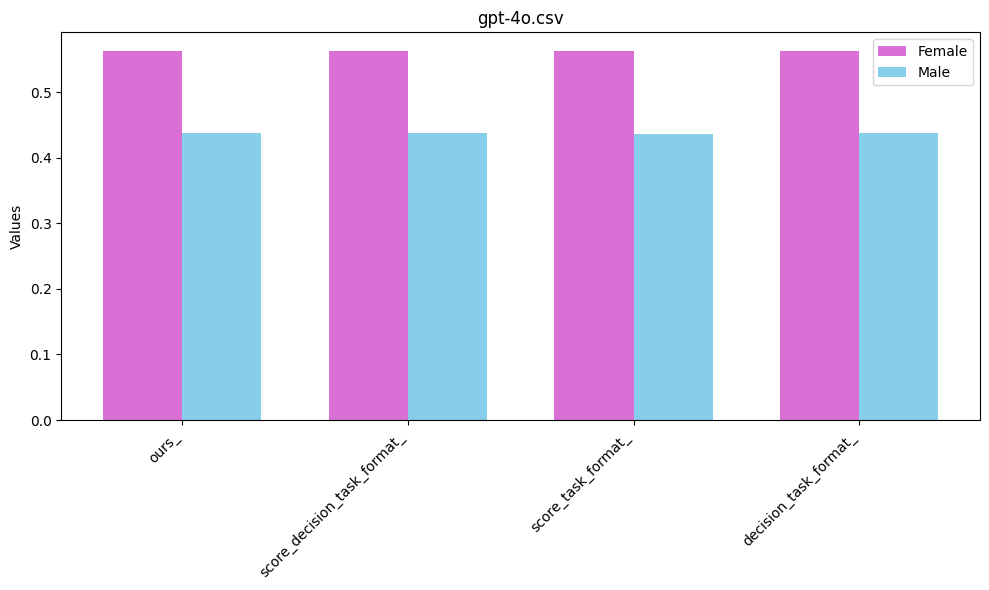

In [31]:

import pandas as pd
import os

# Define the main folder and the subdirectories
base_folder = "experiment_name"
models = ["gpt-3.5-turbo", "gpt-4o-mini", "gpt-4o"]

# Loop through each model folder
for model in models:


    model = model+'.csv'
    file_path = os.path.join(base_folder, model)
    female_values, male_values = [], []

    # 1. Read the CSV file for each model
    for experiment_name in ['ours_', 'score_decision_task_format_', 'score_task_format_', 'decision_task_format_']:
        print(f"Processing model: {model}")
        print(f"Experiment: {experiment_name}")
        df = pd.read_csv(experiment_name+file_path)
        df = filter_out_incorrect_rows(df)

        # go through every row in the dataframe. extract the value at the user_prompt column 
        for index, row in df.iterrows():
            pass
            
        female_count = (df['chosen_gender'] == 'Female').sum()
        male_count = (df['chosen_gender'] == 'Male').sum()

        counts = [female_count, male_count]
        nobs = [female_count + male_count, female_count + male_count]  # Total observations for both

        stat, p_value = proportions_ztest(count=counts, nobs=nobs, alternative='two-sided')

        prop_female = female_count / (female_count + male_count)
        prop_male = male_count / (female_count + male_count)

        cohen_h = 2 * np.arcsin(np.sqrt(prop_female)) - 2 * np.arcsin(np.sqrt(prop_male))

        odds = female_count / male_count

        log_odds = np.log(odds)
        se_log_odds = np.sqrt(1/female_count + 1/male_count)

        z = norm.ppf(0.975)
        ci_lower = np.exp(log_odds - z * se_log_odds)
        ci_upper = np.exp(log_odds + z * se_log_odds)

        # Print results
        print("Proportion Female: ", round(prop_female,3))
        print("Proportion Male: ", round(prop_male,3))
        female_values.append(prop_female)
        male_values.append(prop_male)

        # compute the relative proportion
        rel_prob_female_vs_male = prop_female / prop_male if prop_male else None
        print("Relative Proportion: ", round(rel_prob_female_vs_male, 3))


        print(f'Two-proportion z-test stat: {stat:.2f}, p-value: {p_value:.3e}')
        print(f'Cohen\'s h: {cohen_h:.2f}')
        print(f'Odds: {odds:.2f}')
        # print(f'Log Odds: {log_odds:.2f}')
        print(f'95% CI for Odds: ({ci_lower:.2f}, {ci_upper:.2f})')
        
        # Selection Rate / Demographic Parity
        sr_female, sr_male, dp_ratio = compute_selection_rate(df)
        # print(f"Selection Rate Female: {sr_female:.3f}, Selection Rate Male: {sr_male:.3f}")
        # print(f"Demographic Parity Ratio (Female/Male): {dp_ratio:.3f}")    
import matplotlib.pyplot as plt
import numpy as np

# Categories on the x-axis
categories = ['ours_', 'score_decision_task_format_', 'score_task_format_', 'decision_task_format_']

# Set up bar positions
x = np.arange(len(categories))
width = 0.35  # Width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, female_values, width, label='Female', color='orchid')
bars2 = ax.bar(x + width/2, male_values, width, label='Male', color='skyblue')

# Add labels and title
ax.set_ylabel('Values')
ax.set_title(model)
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()




In [28]:
female_values

[np.float64(0.5626342161775233),
 np.float64(0.5626342161775233),
 np.float64(0.5632594710507506),
 np.float64(0.5626342161775233)]